## Notebook under construction 

## Gradient Descent with Keras

* Demonstrates the parameter fitting using Keras



<a href="https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/gradient_descent_with_keras.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="open in colab">
</a>
| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/gradient_descent_with_keras.ipynb)


In [0]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32)

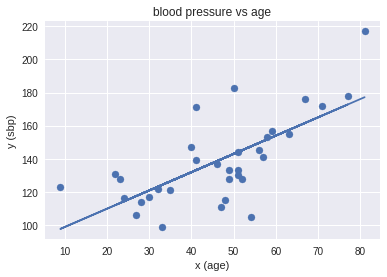

intercept =  87.67143 solpe =  1.1050216


In [3]:
plt.scatter(x=x,y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)


## Keras

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

Using TensorFlow backend.


In [0]:
a=np.array(3,dtype="float32",ndmin=2)
b=np.array(140,dtype="float32",ndmin=1)

In [0]:
model = Sequential()
model.add(Dense(1,input_dim=1))
model.add(Activation('linear'))

opt = optimizers.SGD(lr=0.0004, momentum=0.0, decay=0.0, nesterov=False)

model.compile(loss='mean_squared_error',
              optimizer=opt)


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.set_weights([a,b])

In [9]:
a,b=model.get_weights()
print("slope=",a[0][0],"intercept=",b[0])

slope= 3.0 intercept= 140.0


In [10]:
model.evaluate(x,y)
#loss for the start values a=3 and b=140

33/33 [==============================] - 0s 1ms/step


20826.090909090908

In [12]:
for i in range(0,80000):
    model.fit(x=x,y=y,batch_size=33,
                    epochs=1,
                    verbose = 0)
    a,b=model.get_weights()
    if i % 5000==0:
        MSE=np.mean(np.square(model.predict(x).reshape(len(x),)-y))
        print("Epoch:",i,"slope=",a[0][0],"intercept=",b[0],"MSE=",MSE)

Epoch: 0 slope= -2.5579157 intercept= 139.88821 MSE= 17534.736
Epoch: 5000 slope= 0.45844206 intercept= 121.21214 MSE= 474.0081
Epoch: 10000 slope= 0.69010645 intercept= 109.19476 MSE= 400.59506
Epoch: 15000 slope= 0.838767 intercept= 101.48315 MSE= 370.36453
Epoch: 20000 slope= 0.93416256 intercept= 96.534584 MSE= 357.91595
Epoch: 25000 slope= 0.9953789 intercept= 93.35905 MSE= 352.7897
Epoch: 30000 slope= 1.0346646 intercept= 91.321144 MSE= 350.67862
Epoch: 35000 slope= 1.0598692 intercept= 90.01367 MSE= 349.8095
Epoch: 40000 slope= 1.0760522 intercept= 89.174194 MSE= 349.45148
Epoch: 45000 slope= 1.0864208 intercept= 88.63633 MSE= 349.3042
Epoch: 50000 slope= 1.0930759 intercept= 88.29109 MSE= 349.24347
Epoch: 55000 slope= 1.0973642 intercept= 88.068665 MSE= 349.21832
Epoch: 60000 slope= 1.1000648 intercept= 87.928566 MSE= 349.20816
Epoch: 65000 slope= 1.1018074 intercept= 87.83816 MSE= 349.20395
Epoch: 70000 slope= 1.102908 intercept= 87.781075 MSE= 349.20218
Epoch: 75000 slope= 1.

In [14]:
print("Epoch:",i,"slope=",a[0][0],"intercept=",b[0],"MSE=",MSE)
# optimal vlue for a:   1.1050216
# optimal vlue for b:   87.67143
# minimal loss:         349.2007871685606

Epoch: 79999 slope= 1.1041998 intercept= 87.71408 MSE= 349.2015
